# Settings

In [2]:
%%capture
!python -m pip install --upgrade git+git://github.com/abraia/abraia-multiple.git

import os

if not os.getenv('ABRAIA_KEY'):
    #@markdown <a href="https://abraia.me/console/settings" target="_blank">Get your ABRAIA_KEY</a>
    abraia_key = ''  #@param {type: "string"}
    %env ABRAIA_KEY=$abraia_key

from multiple import *
 
multiple = Multiple()

# Get some sample data

In [23]:
%%capture
#@markdown <a href="https://abraia.me/console/gallery" target="_blank">Upload and manage your hyperspectral data</a>
if not os.path.exists('PaviaU.mat') or not os.path.exists('PaviaU_gt.mat'):
    !wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
    !wget http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

multiple.upload('PaviaU.mat')
multiple.upload('PaviaU_gt.mat')

# Read data from your cloud

In [24]:
img = multiple.load_image('PaviaU.mat')
gt = multiple.load_image('PaviaU_gt.mat')

img.shape, gt.shape

((610, 340, 103), (610, 340))

# Basic visualization

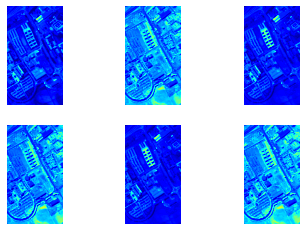

In [19]:
# Get some random bands from HSI cube
imgs, indexes = hsi.random(img)

# View the bands
fig, ax = plt.subplots(2, 3)
ax = ax.reshape(-1)
for i, im in enumerate(imgs):
    ax[i].imshow(im, cmap='jet')
    ax[i].axis('off')

# Reduce dimensionality and visualize principal components



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 339.5, 609.5, -0.5)

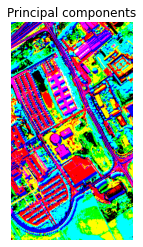

In [20]:
pc_img = hsi.principal_components(img)

plt.title('Principal components')
plt.imshow(pc_img)
plt.axis('off')